# Visualizing the Data

These scripts visualize the dataset for label correlations, label distributions before data split and label distributions after data split.

*Note:* Run the functions with the suffix ```_merged``` for the dataset with 4 labels. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


def get_data(merged=False):
    dataset = "sentences_all.csv"
    if merged:
        dataset = "sentences_all_merged_categories.csv"

    data = pd.read_csv(dataset, index_col=0)
    X = data.iloc[:, 0].to_numpy()
    y = data.iloc[:, 1:].to_numpy().astype(int)
    mask = (y == 0).all(axis=1)
    mask = np.invert(mask)
    y = y[mask, :]
    X = X[mask]
    return X, y


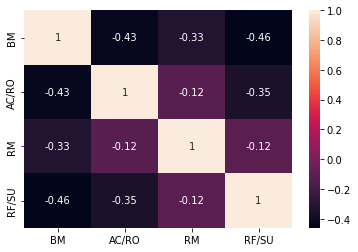

In [3]:
def visualize_label_corr_merged(y):
    data = {
            "BM": y[:, 0],
            "AC/RO": y[:, 1],
            "RM": y[:, 2],
            "RF/SU": y[:, 3],
            }
    df = pd.DataFrame(data, columns=['BM', 'AC/RO', "RM", "RF/SU"])
    ax = sns.heatmap(df.corr(), annot=True)

_, y = get_data(merged=True)
visualize_label_corr_merged(y)


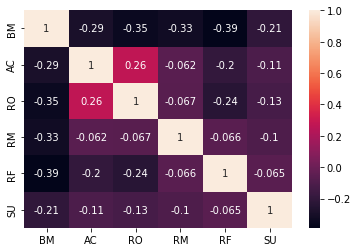

In [4]:
def visualize_label_corr(y):
    data = {
            "BM": y[:, 0],
            "AC": y[:, 1],
            "RO": y[:, 2],
            "RM": y[:, 3],
            "RF": y[:, 4],
            "SU": y[:, 5],
            }
    df = pd.DataFrame(data, columns=['BM', 'AC', "RO", "RM", "RF", "SU"])
    ax = sns.heatmap(df.corr(), annot=True)

_, y = get_data(merged=False)
visualize_label_corr(y)

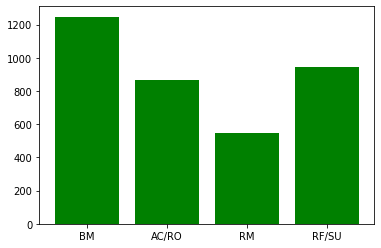

In [5]:
def visualize_label_distribution_merged(y):
    data = {
        "BM": Counter(y[:, 0])[1],
        "AC/RO": Counter(y[:, 1])[1],
        "RM": Counter(y[:, 2])[1],
        "RF/SU": Counter(y[:, 3])[1],
    }
    plt.bar(list(data.keys()), data.values(), color='g')
    plt.show()

_, y = get_data(merged=True)
visualize_label_distribution_merged(y)

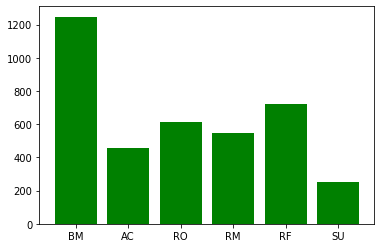

In [6]:
def visualize_label_distribution(y):
    data = {
        "BM": Counter(y[:, 0])[1],
        "AC": Counter(y[:, 1])[1],
        "RO": Counter(y[:, 2])[1],
        "RM": Counter(y[:, 3])[1],
        "RF": Counter(y[:, 4])[1],
        "SU": Counter(y[:, 5])[1],
    }
    plt.bar(list(data.keys()), data.values(), color='g')
    plt.show()

_, y = get_data(merged=False)
visualize_label_distribution(y)


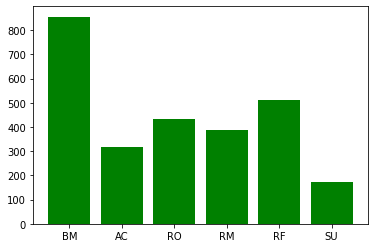

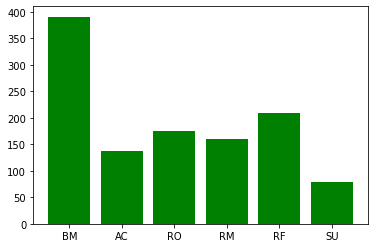

In [7]:
from sklearn.model_selection import train_test_split

def visualize_train_test_split(X, y):
    _, _, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=False, random_state=42)

    visualize_label_distribution(y_train)
    visualize_label_distribution(y_test)

X, y = get_data(merged=False)
visualize_train_test_split(X, y)